In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

In [3]:
df = pd.read_pickle("resources/02_tokenization_natural_flag.pkl")
df.columns = [s.title() for s in df.columns]

HUE = "Model Family"

# df["Model"].str.rsplit(" ", expand=True).apply(lambda x: " ".join(x[:2]), axis=1)
df[HUE] = df["Model"].str.extract(r"^([^\s]+\s+[^\s]+)")

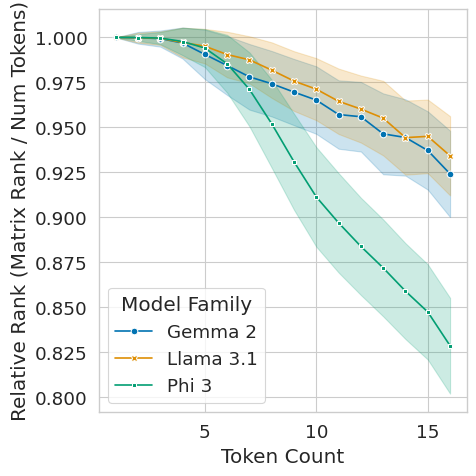

In [4]:
plt.figure(figsize=(5, 5))
sns.lineplot(
    df,
    x=df.columns[2],
    y=df.columns[3],
    hue=HUE,
    style=HUE,
    markers=True,
    dashes=False,
    errorbar=("sd", 0.3),
    palette="colorblind",
)

plt.tight_layout()
plt.savefig("resources/02_tokenization_natural_flag.png", dpi=300, bbox_inches="tight")

<Figure size 500x500 with 0 Axes>

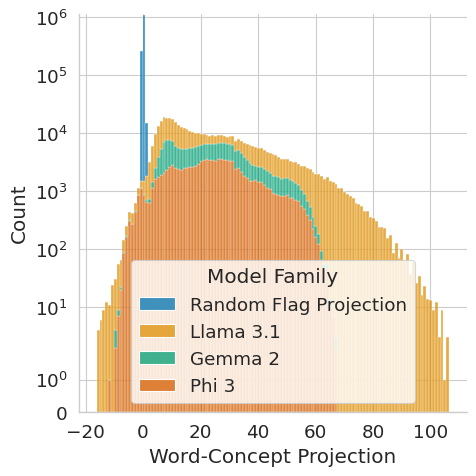

In [5]:
df = pd.read_pickle("resources/05_concept_vs_word_flags_relationship.pkl")

X = "Word-Concept Projection"
HUE = "Model Family"
df = df.rename(columns={"model": HUE, "total projection": X})
df[HUE] = df[HUE].str.extract(r"^([^\s]+\s+[^\s]+)")
df[HUE] = df[HUE].str.replace("Random Projection", "Random Flag Projection")

plt.figure(figsize=(5, 5))
sns.displot(
    df,
    x=X,
    hue=HUE,
    kind="hist",
    binwidth=1,
    shrink=1,
    multiple="stack",
    # height=5,
    # aspect=1.1,
    facet_kws=dict(legend_out=False),
    palette="colorblind",
)
plt.yscale("symlog")

plt.tight_layout()
plt.savefig(
    "resources/05_concept_vs_word_flags_relationship.png", dpi=300, bbox_inches="tight"
)

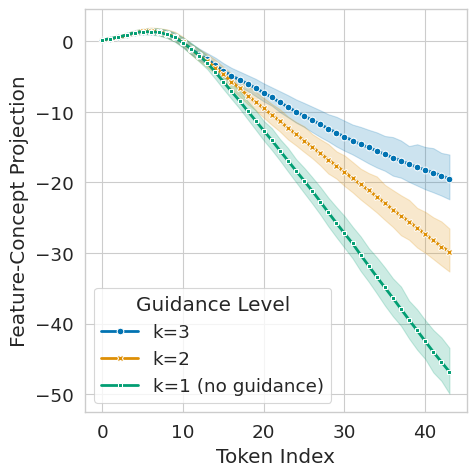

In [6]:
df = pd.read_pickle("resources/08_guided_generation_topk_comparison.pkl")
Y = "Feature-Concept Projection"
df = df.rename(columns={"total projection": Y})
df.columns = [s.title() for s in df.columns]

plt.figure(figsize=(5, 5))
sns.lineplot(
    df,
    x=df.columns[0],
    y=Y,
    hue=df.columns[-1],
    style=df.columns[-1],
    markers=True,
    dashes=False,
    errorbar=("ci", 95),
    palette="colorblind",
    linewidth=2,
)

plt.tight_layout()
plt.savefig(
    "resources/08_guided_generation_topk_comparison.png", dpi=300, bbox_inches="tight"
)

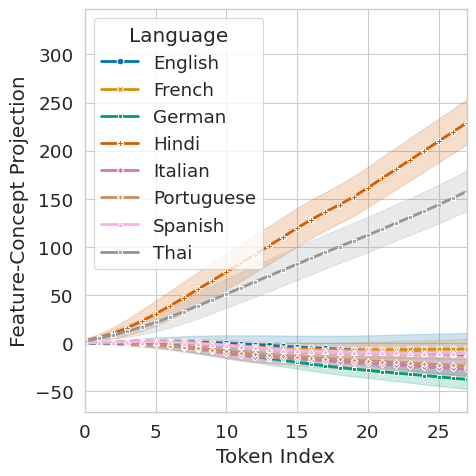

In [7]:
df = pd.read_pickle("resources/09_guided_generation_lang_comparison.pkl")
Y = "Feature-Concept Projection"
df = df.rename(columns={"total projection": Y})
df.columns = [s.title() for s in df.columns]

X = df.columns[0]
HUE = df.columns[-1]

plt.figure(figsize=(5, 5))
sns.lineplot(
    df,
    x=X,
    y=Y,
    hue=HUE,
    style=HUE,
    markers=True,
    dashes=False,
    errorbar=("sd", 1),
    palette="colorblind",
    linewidth=2,
)
plt.xlim(0, df.groupby(HUE)[X].max().min())
plt.tight_layout()
plt.savefig(
    "resources/09_guided_generation_lang_comparison.png", dpi=300, bbox_inches="tight"
)

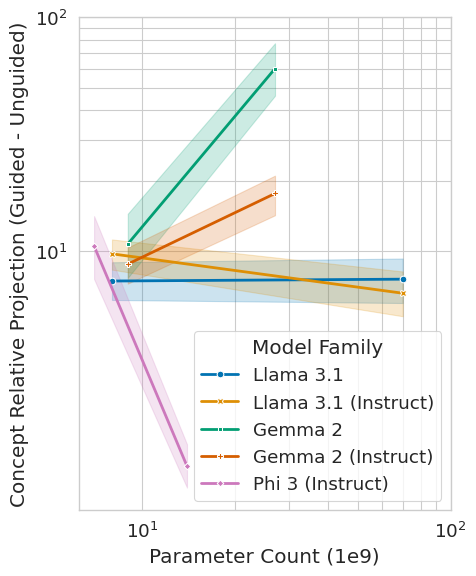

In [9]:
df = pd.read_pickle("resources/10_guided_generation_model_comparison.pkl")
df = df[df["id"] != "microsoft/Phi-3-mini-4k-instruct"]

df["family"] = np.where(
    df["id"].str.lower().str.contains("it|instruct"),
    df["family"] + " (Instruct)",
    df["family"],
)
df.rename(columns={"family": "Model Family"}, inplace=True)
df[df.columns[-1]] = pd.to_numeric(df[df.columns[-1]])

plt.figure(figsize=(5, 6))
plt.yscale("symlog")
plt.xscale("log")
sns.lineplot(
    df,
    x=df.columns[-1],
    y=df.columns[-2],
    hue=df.columns[1],
    style=df.columns[1],
    markers=True,
    dashes=False,
    errorbar=("ci", 95),
    palette="colorblind",
    linewidth=2,
)
plt.xticks(range(10, 101, 10))
plt.yticks(range(10, 101, 10))

plt.tight_layout()
plt.savefig(
    "resources/10_guided_generation_model_comparison.png", dpi=300, bbox_inches="tight"
)

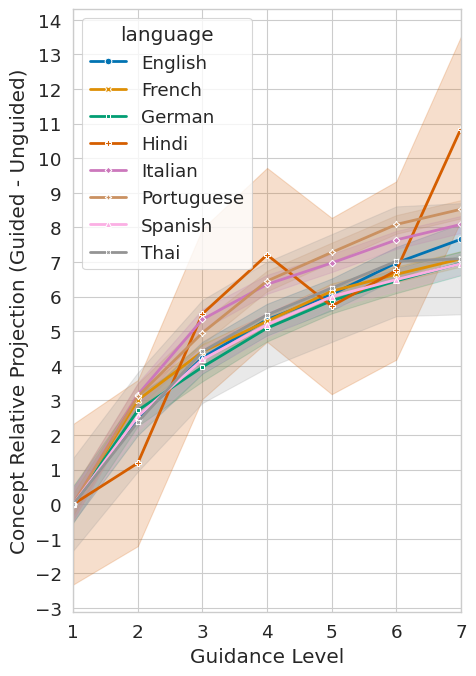

In [32]:
df = pd.read_pickle("resources/11_guided_generation_language_topk_ablation.pkl")

X = "Guidance Level"
Y = "Concept Relative Projection (Guided - Unguided)"
HUE = "language"

plt.figure(figsize=(5, 7))
sns.lineplot(
    df,
    x=X,
    y=Y,
    hue=HUE,
    style=HUE,
    markers=True,
    dashes=False,
    errorbar=("sd", 3e-2),
    palette="colorblind",
    linewidth=2,
)
plt.xlim(1, 7)
plt.yticks(range(-3, 15))
plt.xticks(range(1, 8))

plt.tight_layout()
plt.savefig(
    "resources/11_guided_generation_language_topk_ablation.png",
    dpi=300,
    bbox_inches="tight",
)

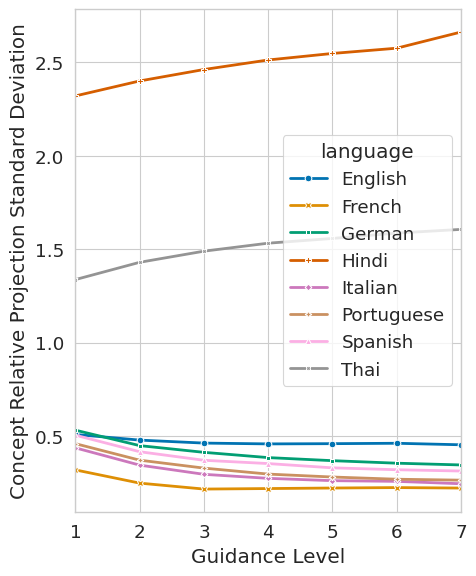

In [48]:
df2 = df.groupby([X, HUE])[Y].std().reset_index()

Y2 = "Concept Relative Projection Standard Deviation"
df2 = df2.rename(columns={Y: Y2})
df2[Y2] *= 3e-2  # To make it comparable to the original plot

plt.figure(figsize=(5, 6))
sns.lineplot(
    df2,
    x=X,
    y=Y2,
    hue=HUE,
    style=HUE,
    markers=True,
    dashes=False,
    errorbar=("sd", 3e-2),
    palette="colorblind",
    linewidth=2,
)
plt.xlim(1, 7)
# plt.yticks(range(-3, 15))
plt.xticks(range(1, 8))

plt.tight_layout()
plt.savefig(
    "resources/11_guided_generation_language_topk_ablation_std.png",
    dpi=300,
    bbox_inches="tight",
)